# Report on Customer Churn data

## Objectives and data summary
For this particular project, I have chosen data from the IBM sample data set collection on Telco customer churn. This data set is interesting as it provides valuable insight into how to predict churn on an individual customer and in return take counter measures (such as special offers or discounts) to keep them from leaving. This is a typical classification problem in the domain of supervised learning and I wanted the chance to have a look at the data mentioned during the lectures. Our model will be therefore be focused on __prediction__.

In [1]:
#start by importing necessary modules
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Exploration

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv') #import data set
df.head() #quick look at the structure of the data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info() #check for missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.describe() #getting statistical information for the numerical features

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Next we want to check the unique values each feature can take on

In [5]:
#looping through the columns to see their unique values
for i in df.columns:
    print(df[i].value_counts())

5986-WWXDV    1
2826-DXLQO    1
6424-ELEYH    1
9052-VKDUW    1
2144-BFDSO    1
             ..
2509-TFPJU    1
9554-DFKIC    1
9367-OIUXP    1
2911-WDXMV    1
2692-AQCPF    1
Name: customerID, Length: 7043, dtype: int64
Male      3555
Female    3488
Name: gender, dtype: int64
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3088
Yes

After looking into the columns and their unique values, the features can be clustered into different categories:

### Classification labels
Churn: Whether or not the customer churned (Yes or No)

### Customer services booked
PhoneService: Whether or not the customer has a phone service (Yes or No)

MultipleLines: Whether or not the customer has multiple lines (Yes, No, No Phone Service)

InternetService: Customer's internet provider (DSL, Fiber optic, No)

OnlineSecurtiy: Whether or not the customer has online security (Yes, No, No internet service)

OnlineBackup: Whether or not the customer has online backup (Yes, No, No internet service)

DeviceProtection: Whether the customer has device protection (Yes, No, No internet service)

TechSupport: Whether the customer has tech support (Yes, No, No internet service)

StreamingTV: Whether the customer has streaming TV (Yes, No, No internet service)

StreamingMovies: Whether the customer has streaming movies (Yes, No, No internet service)

### Customer account information
Tenure: Number of months the customer has stayed with the company

Contract: The contract term of the customer (Month-to-month, One year, Two year)

PaperlessBilling: Whether the customer has paperless billing (Yes, No)

PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

MonthlyCharges: The amount charged to the customer monthly

TotalCharges: The total amount charged to the customer

### Customer demographic info
customerID: Customer ID

Gender: Whether the customer is a male or a female

SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)

Partner: Whether the customer has a partner or not (Yes, No)

Dependents: Whether the customer has dependents or not (Yes, No)

## Data preprocessing/cleaning

The tenure and TotalCharges features need their data types to be changed to float:

In [6]:
def feature_to_float(feature_list, df):
    for i in feature_list:
        df[i] = df[i].astype(float)
    return df

feature_to_float(['tenure'],df)

#TotalCharges is trickier to change
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors = 'coerce')

Now we can check all the data types of the features are correct:

In [7]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

And that there are no missing values:

In [8]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

TotalCharges has 11 missing values so the relevant rows are deleted for simplicity:

In [9]:
df = df.drop('TotalCharges', 1)

df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
Churn                object
dtype: object

## Preliminary Findings and Insights

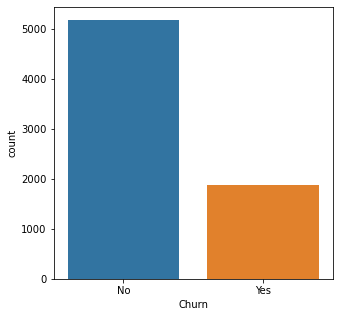

In [10]:
#display a frequency distribution for churn
plt.figure(figsize=(5,5))
ax = sns.countplot(x=df['Churn'],linewidth=1)
plt.show()

This plot shows a class imbalance of churners and non-churners data. Resampling would be the most suitable approach, but in this case, the imbalance is kept.

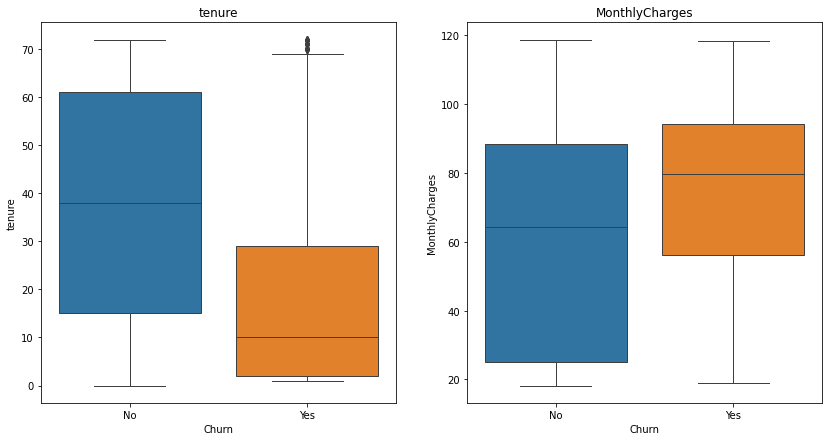

In [11]:
#generating boxplots
plots={1: [111], 2: [121,122], 3: [131,132,133],4:[221,222,223,224],5:[231,232,233,234,235],
6:[231,232,233,234,235,236]}

def boxplot(x,y,df):
    rows = int(str(plots[len(y)][0])[0])
    columns = int(str(plots[len(y)][0])[1])
    plt.figure(figsize=(7*columns,7*rows))
    
    for i, j in enumerate(y):
        plt.subplot(plots[len(y)][i])
        ax = sns.boxplot(x=x, y=j,data=df[[x,j]],linewidth=1)
        ax.set_title(j)
        
    return plt.show()

#boxplots for tenure and MonthlyCharges
boxplot("Churn", ["tenure","MonthlyCharges"],df)

Churning customers have much lower tenure with a median of ca. 10 months compared to a median of non-churners of ca. 38 months.

Churning customers have higher monthly charges with a median of ca. 80 USD and much lower interquartile range compared to that of non-churners (median of ca. 65 USD).

TotalCharges are the result of tenure and MonthlyCharges, which are more insightful on an individual basis.

## Feature Engineering

For machine readibility and further analysis:

### Columns removed
customerID: not relevant

### No action
SeniorCitizen

### Label encoding
These features can only take one of 2 values (yes or no) so are transformed to binary integers:

gender

Partner

Dependents

Churn

PhoneService

PaperlessBilling

### One-Hot Encoding
These features are also categorical but take on more than 2 values. For each value, a new variable is created with a binary integer indicating if the value occured in a data entry or not (1 or 0)

MultipleLines

InternetService

OnlineSecurity

OnlineBackup

DeviceProtection

TechSupport

StreamingTV

StreamingMovies

Contract

PaymentMethod

### Min-Max Scaling
Values of numerical features are rescaled between a range of 0 and 1. Min-max scaler is the standard approach for scaling. For normally distributed features standard scaler could be used, which scales values around a mean of 0 and a standard deviation of 1. For simplicity we use min-max scaler for all numerical features.

tenure

TotalCharges

MonthlyCharges

In [12]:
#drop customerID feature
df = df.drop(columns = 'customerID')

#label encoding
def label_encoding(features, df):
    for i in features:
        df[i] = df[i].map({'Yes': 1, 'No': 0})
    return
label_encoding(['Partner', 'Dependents', 'Churn', 'PhoneService', 'PaperlessBilling'], df)

#gender doesn't take yes or no
df['gender'] = df['gender'].map({'Female':1, 'Male':0})

#one-hot encoding
features_ohe = ['MultipleLines','InternetService','OnlineSecurity','OnlineBackup',
'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract',
'PaymentMethod']
df = pd.get_dummies(df, columns=features_ohe)

#min-max scaling
from sklearn.preprocessing import MinMaxScaler
features_mms = ['tenure', 'MonthlyCharges']
df_features_mms = pd.DataFrame(df,columns=features_mms)
df_remaining_features = df.drop(columns=features_mms)
mms = MinMaxScaler()
rescaled_features = mms.fit_transform(df_features_mms)
df_rescaled_features = pd.DataFrame(rescaled_features,columns=features_mms,
index=df_remaining_features.index)
df = pd.concat([df_remaining_features,df_rescaled_features],axis=1)

## Hypothesis Building

1. The longer the contract duration the less likely it is that the customer will churn as he/she is less frequently confronted with the termination/prolongation decision and potentially values contracts with reduced effort.


2. Customers with spouses and children might churn less to keep the services running for their family.


3. More expensive contracts lead to increased churn as the chances to save money by changing providers might be higher.


4. Tenure, contract duration terms and number of additional services are assumed to be among the most important drivers of churn.

Our hypothesis regarding tenure being the strongest factor for not churning can already be supported by the boxplot from the Key Findings and Insights section. As previously stated: Churning customers have much lower tenure with a median of ca. 10 months compared to a median of non-churners of ca. 38 months. 

## Train-Test Split

To begin model training, the data set must be split into 80% training data and 20% test data. The 'Churn' column is defined as the class (y) and the remaining columns are the features (x).

In [13]:
## we apply sklearn's splitter function
from sklearn.model_selection import train_test_split

X1 = df.drop('Churn', axis=1)
X = X1.values
y = df['Churn'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,
                                                   random_state=42)

## Model Training: Logistic Regression
Customer churn is an example of categorical data rather than continuous data so we must use a variation of linear regression: __Logistic Regression__

In [14]:
from sklearn.linear_model import LogisticRegression

# Instanciate and train the model on the training dataset
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Now make predictions using the trained model on the test dataset
y_pred_logreg = logreg.predict(X_test)
y_pred_logreg_prob = logreg.predict_proba(X_test)

In order to evaluate the performance of this model, there are 2 main metrics we will use: __Feature Weights__ and __Accuracy Score__

The feature weights indicate the top features used by the model to generate predictions while the accuracy score will give us the overall accuracy of the model for the training set and test set. 


Accuracy Score Test: 0.8204400283889283
Accuracy Score Train: 0.8003194888178914 (as comparison)


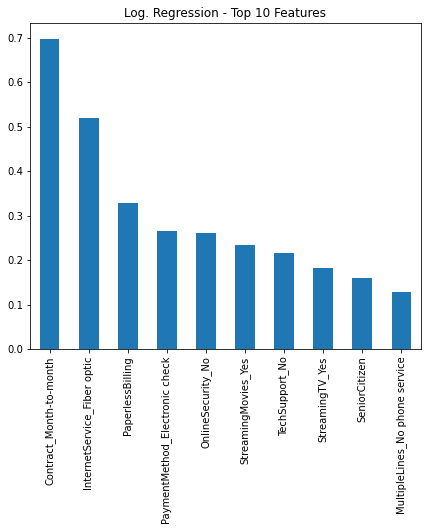

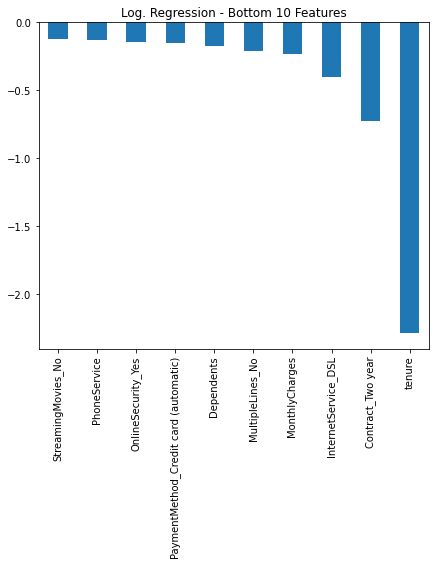

In [15]:
from sklearn.metrics import accuracy_score

## define a function that can plot the feature weights for our model
def feature_weights(X_df, classifier, classifier_name):
    weights = pd.Series(classifier.coef_[0],index=X_df.columns.values).sort_values(ascending=False)
    
    top_weights_selected = weights[:10]
    plt.figure(figsize=(7,6))
    plt.tick_params(labelsize=10)
    plt.title(f'{classifier_name} - Top 10 Features')
    top_weights_selected.plot(kind='bar')
    
    bottom_weights_selected = weights[-10:]
    plt.figure(figsize=(7,6))
    plt.tick_params(labelsize=10)
    plt.title(f'{classifier_name} - Bottom 10 Features')
    bottom_weights_selected.plot(kind='bar')
    
    return print("")

feature_weights(X1,logreg,'Log. Regression')
print(f'Accuracy Score Test: {accuracy_score(y_test, y_pred_logreg)}')
print(f'Accuracy Score Train: {logreg.score(X_train,  y_train)} (as comparison)')

## Model Assessment

For Logistic Regression GridSearchCV is used to determine the best model while applying different values of L1 or L2 regularization to turn the impact of non-meaningful feature to zero (L1) or to simplify the model by relativizing strong patterns that are picked up during training (L2).

In [16]:
from sklearn.model_selection import GridSearchCV

# define parameter grid for GridSearch and instanciate and train model
param_grid_L1 = {'penalty':['l1','l2'],'C':np.arange(.1,5,.1)}
logreg_tuned = LogisticRegression(solver='saga', max_iter=1000)
logreg_tuned_gs = GridSearchCV(logreg_tuned,param_grid_L1,cv=5)
logreg_tuned_gs.fit(X_train,y_train)

# make predictions using the trained model on test dataset
y_pred_logreg_tuned = logreg_tuned_gs.predict(X_test)
y_pred_logreg_tuned_prob = logreg_tuned_gs.predict_proba(X_test)

print('Logistic Regression - Best Parameters: ', logreg_tuned_gs.best_params_)

print(f'Accuracy Score Test: {accuracy_score(y_test, y_pred_logreg_tuned)}')
print(f'Accuracy Score Train: {logreg_tuned_gs.score(X_train,  y_train)} (as comparison)')

Logistic Regression - Best Parameters:  {'C': 0.30000000000000004, 'penalty': 'l1'}
Accuracy Score Test: 0.8218594748048261
Accuracy Score Train: 0.8003194888178914 (as comparison)


## Model Training: K Nearest Neighbours
Logistic regression is a fast and linear model but we can also try a K Nearest Neighbours model which is simpler.

In [17]:
from sklearn.neighbors import KNeighborsClassifier

#instanciate and train the model
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

#make predictions
y_pred_knn = knn.predict(X_test)
y_pred_knn_prob = knn.predict_proba(X_test)

#model evaluation
print(f'Accuracy Score Test: {accuracy_score(y_test, y_pred_knn)}')
print(f'Accuracy Score Train: {knn.score(X_train,  y_train)} (as comparison)')

Accuracy Score Test: 0.7665010645848119
Accuracy Score Train: 0.8367057152999645 (as comparison)


## Model Assessment
Once again we can use GridSearchCV to optimise model performance by getting the optimal number of neighbours

In [18]:
# define parameter grid for GridSearch and instanciate and train model
param_grid = {'n_neighbors': np.arange(1,30)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train,y_train)

#make predictions
y_pred_knn_tuned = knn_cv.predict(X_test)
y_pred_knn_tuned_prob = knn_cv.predict_proba(X_test)

print('KNN best number of neighbours:',knn_cv.best_params_,'\n')

#model evaluation
print(f'Accuracy Score Test: {accuracy_score(y_test, y_pred_knn_tuned)}')
print(f'Accuracy Score Train: {knn_cv.score(X_train,  y_train)} (as comparison)')

KNN best number of neighbours: {'n_neighbors': 22} 

Accuracy Score Test: 0.7927608232789212
Accuracy Score Train: 0.8017394391196309 (as comparison)


## Model Training: RandomForest
We can also try an ensemble model.

In [19]:
from sklearn.ensemble import RandomForestClassifier

#instanciate and train the random forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

#make predictions
y_pred_rf = rf.predict(X_test)
y_pred_rf_prob = rf.predict_proba(X_test)

#model evaluation
print(f'Accuracy Score Test: {accuracy_score(y_test, y_pred_rf)}')
print(f'Accuracy Score Train: {rf.score(X_train,  y_train)} (as comparison)')

Accuracy Score Test: 0.78708303761533
Accuracy Score Train: 0.9982250621228257 (as comparison)


## Model Assessment
This time we use RandomSearchCV to optimise for several hyperparameters

In [20]:
from sklearn.model_selection import RandomizedSearchCV

#define parameter grid for RandomizedSearch and instanciate and train model
param_grid_rf = {'n_estimators': np.arange(10,2000,10),
                'max_features':['auto','sqrt'],
                'max_depth':np.arange(10,200,10),
                'criterion':['gini','entropy'],
                'bootstrap':[True, False]}

rf = RandomForestClassifier()
rf_random_grid = RandomizedSearchCV(estimator=rf,param_distributions=param_grid_rf,cv=5,verbose =0)
rf_random_grid.fit(X_train,y_train)

#make predictions
y_pred_rf_tuned = rf_random_grid.predict(X_test)
y_pred_rf_tuned_prob = rf_random_grid.predict_proba(X_test)

print('Random Forest - Best Parameters:', rf_random_grid.best_params_)

#model evaluation
print(f'Accuracy Score Test: {accuracy_score(y_test, y_pred_rf_tuned)}')
print(f'Accuracy Score Train: {rf_random_grid.score(X_train,  y_train)} (as comparison)')


Random Forest - Best Parameters: {'n_estimators': 940, 'max_features': 'auto', 'max_depth': 10, 'criterion': 'entropy', 'bootstrap': True}
Accuracy Score Test: 0.8097941802696949
Accuracy Score Train: 0.8610223642172524 (as comparison)


## Best Model
We can see that the best Test score is achieved with the logistic regression model (82%). The random forest model is overfitting as the train score (86%) is much higher than the test score (80%).

## Key Findings and Insights
Looking at our model results, we achieved an accuracy on the test set of 82% which is reasonably strong.

The hypotheses we built can now be supported or refused thanks to the evaluation results, specifically the feature weights:

__Contract Duration__: Contract duration month-to-month is the largest driver of churn -> this is supported 

__Partners and Children__: This feature did not rank very highly in drivers of not churning -> partially supported

__Tenure__: High tenure ranks as the strongest factor for not churning and is the strongest feature overall -> supported. Also supported by the boxplot in the Data Exploration step.

## Conclusion and Next Steps
In summary, the only real issue with the data collected is the imbalance of data regarding churned customers and non-churned customers as shown previously in a histogram. Aside from minor data cleaning due to a few missing values, the data set is of good quality. Additionally, a check for outliers was carried out (IQR method) and none were detected. So the only request to be made is for resampling of churned and non-churned customers.